In [1]:
import os, sys, glob, json, scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
os.chdir("../")
path = os.getcwd()
sys.path.insert(0, path)
import GWGen
from GWGen.WFGenerator import *

In [2]:
foldpath = os.getcwd()+"/Data/Output/"
filenames = glob.glob(foldpath+"*.json")
data = []
for file in filenames:
    with open(file, "r") as f:
        data.append(json.load(f))
data[-1]
datframe = pd.DataFrame(data)
datframe

,SMBHMASS,SecondaryMass,PROCAMASS,p0,e0,BHSpin,Trajectory Exit Reason,unmodded final position,modded final position,unmodded final separatrix,modded final separatrix,mismatch,faithfulness,snr2,DeltaNOrbits
0,10000000.0,10,3.100000e-19,4.830,0.1,0.66,Separatrix reached!,3.871207,3.871207,3.671207,3.671207,0.000000,1.000000,0.675963,0.000000
1,10000000.0,10,3.100000e-19,4.830,0.2,0.66,Separatrix reached!,3.976294,3.976294,3.776294,3.776294,0.000000,1.000000,0.643658,0.000000
2,10000000.0,10,3.100000e-19,4.830,0.3,0.66,Separatrix reached!,4.090503,4.090503,3.890503,3.890503,0.000000,1.000000,0.629349,0.000000
3,10000000.0,10,3.100000e-19,4.795,0.4,0.66,Separatrix reached!,4.222196,4.222196,4.022196,4.022196,0.000000,1.000000,0.604584,0.000000
4,10000000.0,10,3.100000e-19,4.760,0.5,0.66,Separatrix reached!,4.376424,4.376424,4.176424,4.176424,0.000000,1.000000,0.588465,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10674,50000000.0,10,4.400000e-19,4.830,0.3,0.70,Integration reached time boundary. Boundary lo...,4.802284,4.802283,3.763867,3.763868,0.000007,0.999549,0.000665,-0.000076
10675,50000000.0,10,4.400000e-19,4.795,0.4,0.70,Integration reached time boundary. Boundary lo...,4.767920,4.767919,3.899107,3.899108,0.000010,0.999672,0.000993,0.000019
10676,50000000.0,10,4.400000e-19,4.760,0.5,0.70,Integration reached time boundary. Boundary lo...,4.735409,4.735408,4.039077,4.039077,0.000014,0.999740,0.001431,0.000127
10677,50000000.0,10,4.400000e-19,4.610,0.6,0.70,Integration reached time boundary. Boundary lo...,4.588389,4.588388,4.185911,4.185911,0.000016,0.999839,0.002948,0.000599


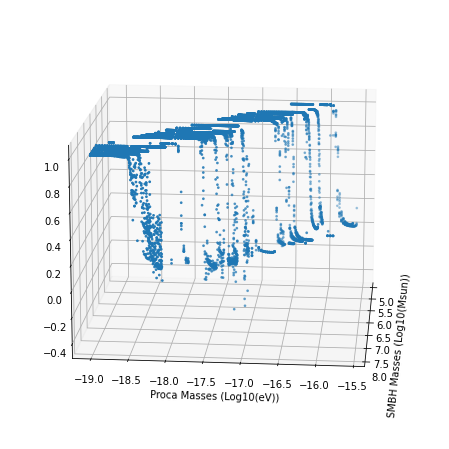

In [17]:
xdat = datframe["SMBHMASS"]
ydat = datframe["PROCAMASS"]
zdat = datframe["faithfulness"]
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(np.log10(xdat), np.log10(ydat), zdat,s=3)
ax.set_ylabel("Proca Masses (Log10(eV))")
ax.set_xlabel("SMBH Masses (Log10(Msun))")
ax.view_init(15,5)

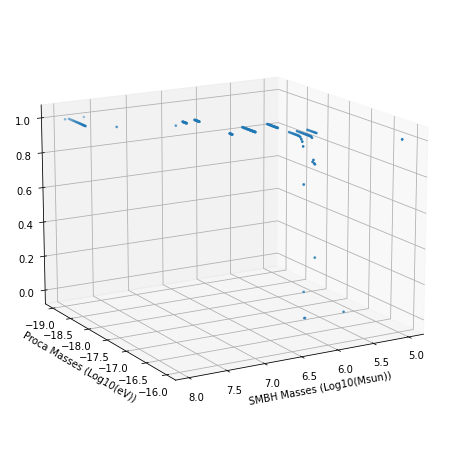

In [58]:
tmpdat = datframe[(datframe["e0"]==0.1)&(datframe["BHSpin"]==0.63)]
xdat = tmpdat["SMBHMASS"]
ydat = tmpdat["PROCAMASS"]
zdat = tmpdat["faithfulness"]
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(np.log10(xdat), np.log10(ydat), zdat,s=3)
ax.set_ylabel("Proca Masses (Log10(eV))")
ax.set_xlabel("SMBH Masses (Log10(Msun))")
ax.view_init(15,60)

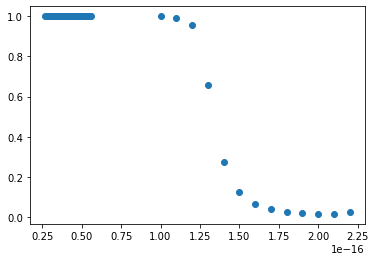

In [64]:
bhmass = 100000
e0 = 0.1
bhspin = 0.6
newdat = datframe[(datframe["SMBHMASS"]==bhmass)&(datframe["e0"]==e0)&(datframe["BHSpin"]==bhspin)]
xdat = newdat["PROCAMASS"]
ydat = (newdat["snr2"])**(1/2)
zdat = newdat["faithfulness"]
plt.scatter(xdat,zdat)